In [1]:
import pandas as pd
import pickle
pd.set_option("display.max_colwidth", None)
#pd.set_option("display.max_rows", None)
import logging
from time import time
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)
import numpy as np
import os
import re
import csv
from emot.emo_unicode import UNICODE_EMOJI, EMOTICONS_EMO
from gensim.models import Word2Vec
import multiprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.svm import SVC
import ruptures as rpt
import matplotlib.pyplot as plt
from math import sqrt
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import itertools
from collections import defaultdict
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

In [17]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\wv_model.pkl", "rb") as f:
    wv_model = pickle.load(f)
wv = wv_model.wv

In [59]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\august_muslim_terms.pkl", "rb") as f:
    muslim_terms = pickle.load(f)

In [61]:
len(muslim_terms)

103

In [64]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\new muslim related search terms.pkl", "rb") as f:
    new_muslim_terms = pickle.load(f)

In [65]:
new_muslim_terms

['muzlims',
 'masjids',
 'terrorism',
 'talibani',
 'madarasa',
 'islamic',
 'maulavis',
 'jihadi',
 'maulanas',
 'islamik',
 'terrorist',
 'muslim',
 'musalmans',
 'maszid',
 'jihad',
 'muzlim',
 'jihaad',
 'pakistanis',
 'wahhabi',
 'madrasas',
 'mullahs',
 'mosque',
 'masjid',
 'fanatics',
 'islam',
 'madrassa',
 'pakistan',
 'amuslims',
 'hardliners',
 'minorities',
 'mushlim',
 'maulvis',
 'ahmediyas',
 'fundamentalist',
 'jehadi',
 'madrassas',
 'deobandi',
 'jehaadi',
 'peacefuls',
 'sunnis',
 'refugees',
 'islamists',
 'minorites',
 'madarsa',
 'terrorists',
 'arab',
 'shia',
 'jihaadi',
 'arabs',
 'muslims',
 'mullas',
 'wahabi',
 'islaamic',
 'jihadist',
 'jahadi',
 'radical',
 'jihadis',
 'shias',
 'islamist',
 'radicals',
 'amuslim',
 'moslems',
 'madarsas',
 'moslem',
 'mosques',
 'jehad',
 'quran',
 'extremist',
 'zihad',
 'minority',
 'separatist',
 'zihadi',
 'islaam',
 'islamo',
 'madrasa']

In [41]:
terms = ["caa", "nrc", "shaheen", "protest"]

In [47]:
caa_terms = []
for term in terms:
    similar_list = wv.most_similar(positive = [term], topn = 100)
    for tup in similar_list:
        if tup[1] >= 0.5:
            caa_terms.append(tup[0])
caa_terms = list(set(caa_terms))

In [48]:
caa_terms.remove("tauheen")

In [77]:
caa_terms

['shn',
 'protestors',
 'saheen',
 'protesting',
 'agitation',
 'caa',
 'shahin',
 'npr',
 'sahinbag',
 'cca',
 'shaheenbagh',
 'anticaa',
 'nrc',
 'dharna',
 'ucc',
 'protesters',
 'shaeen',
 'shaheenbag',
 'shahinbagh',
 'demonstrations',
 'sahin',
 'protests']

In [50]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\caa_terms.pkl", "wb") as f:
    pickle.dump(caa_terms, f)

In [51]:
terms = ["riots", "pogrom", "riot", "danga", "dange"]

In [52]:
riot_terms = []
for term in terms:
    similar_list = wv.most_similar(positive = [term], topn = 100)
    for tup in similar_list:
        if tup[1] >= 0.5:
            riot_terms.append(tup[0])

In [54]:
riot_terms = list(set(riot_terms))

In [56]:
riot_terms.remove("protests")

In [70]:
for term in riot_terms:
    try:
        if term[0] == "v":
            riot_terms.remove(term)
    except:
        pass

In [72]:
riot_terms.remove("clashes")

In [73]:
riot_terms

['danga',
 'pogroms',
 'roit',
 'rioting',
 'genocide',
 'massacre',
 'carnage',
 'pogrom',
 'lynching',
 'roits',
 'genocides',
 'riot',
 'riots',
 'rioters']

In [74]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\riot_terms.pkl", "wb") as f:
    pickle.dump(riot_terms, f)

In [120]:
terms = ["ramadan", "ramzan", "eid", "jummah"]

In [122]:
ramzan_terms = []
for term in terms:
    similar_list = wv.most_similar(positive = [term], topn = 100)
    for tup in similar_list:
        if tup[1] >= 0.5:
            ramzan_terms.append(tup[0])

In [123]:
ramzan_terms

['ramzan',
 'eid',
 'ramazan',
 'ramadhan',
 'ramadaan',
 'ramdan',
 'navratri',
 'ramdaan',
 'ramzaan',
 'shawwal',
 'ashra',
 'fasting',
 'ramadan',
 'ramazan',
 'ramdan',
 'eid',
 'ramadaan',
 'navratri',
 'ramjan',
 'ramdaan',
 'ramzaan',
 'ramadhan',
 'ramadan',
 'ramzan',
 'easter',
 'ramdaan',
 'ramazan',
 'ugadi',
 'baisakhi',
 'holi',
 'navratri',
 'navroz',
 'mubarak',
 'baishaki',
 'navreh',
 'idd',
 'juma',
 'jumah',
 'taraweeh',
 'tul',
 'jumma',
 'fajr']

In [128]:
terms_to_remove = ["navratri", "shawwal", "ashra", "fasting", "navratri", "ugadi", "baisakhi", "easter", "holi", "navratri", \
                   "navroz", "mubarak", "baisakhi", "navreh", "taraweeh", "tul", "fajr", "baishaki"]

In [129]:
for term in terms_to_remove:
    try:
        ramzan_terms.remove(term)
    except:
        pass

In [130]:
ramzan_terms = list(set(ramzan_terms))

In [131]:
ramzan_terms

['eid',
 'ramadaan',
 'ramadhan',
 'ramdaan',
 'ramdan',
 'ramzaan',
 'ramazan',
 'ramjan',
 'idd',
 'juma',
 'jumah',
 'ramzan',
 'jumma',
 'ramadan']

In [133]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\ramzan_terms", "wb") as f:
    pickle.dump(ramzan_terms, f)

In [75]:
#finding conversations containing caa terms

In [96]:
class find_caa_convos:
    
    def __init__(self, folder, terms):
        self.folder = folder
        self.terms = terms
        self.file_list = [file for file in os.listdir(self.folder) if ".csv" in file]
        self.convo_ids = self.find_ids()
        self.save_output = self.save_output()
        
        
    def find_ids(self):
        convo_ids = []
        for file in self.file_list:
            with open(os.path.join(self.folder, file), "rb") as f:
                df = pickle.load(f)
            for i in range(df.shape[0]):
                if any([term in df.at[i, "cleaned_tweet"] for term in self.terms]):
                    convo_ids.append(df.at[i, "conversation_id"])
                elif any([term in df.at[i, "hashtag"] for term in self.terms]):
                    convo_ids.append(df.at[i, "conversation_id"])
                else:
                    pass
        return list(set(convo_ids))
    
    def save_output(self):
        _name = self.folder.rpartition("august cleaned ")[-1]
        with open(os.path.join(self.folder, "{} caa_convo_ids.pkl".format(_name)), "wb") as f:
            pickle.dump(self.convo_ids, f)

In [100]:
t = time()
state_list = ["Andhra_Pradesh", "Arunachal", "Assam", "Bengal", "Bihar", "Chandigarh", "Chattisgarh", \
              "Delhi", "Goa", "Gujarat", "Haryana", "Himachal", "Jharkhand", "Karnataka", "Kerala", \
              "Maharashtra","Manipur", "Meghalaya", "Mizoram", "MP", "Nagaland", "Odisha", "Punjab", "Rajasthan", \
              "Sikkim", "Telangana", "TN", "Tripura", "UP", "Uttarakhand"]
for _state in state_list:
    t_1 = time()
    wd = "C:\\Users\\rahul\\Complete thesis data\\august cleaned data\\"
    folder_name = wd + "august cleaned " + _state
    find_caa_convos(folder_name, caa_terms)
    print("{} finished".format(_state))
    print("time taken: {} mins".format(round((time() - t_1)/60, 2)))
print("time taken: {} mins".format(round((time() - t)/60, 2)))

Andhra_Pradesh finished
time taken: 0.65 mins
Arunachal finished
time taken: 0.03 mins
Assam finished
time taken: 0.3 mins
Bengal finished
time taken: 0.8 mins
Bihar finished
time taken: 0.46 mins
Chandigarh finished
time taken: 0.2 mins
Chattisgarh finished
time taken: 0.37 mins
Delhi finished
time taken: 3.05 mins
Goa finished
time taken: 0.11 mins
Gujarat finished
time taken: 1.06 mins
Haryana finished
time taken: 0.24 mins
Himachal finished
time taken: 0.03 mins
Jharkhand finished
time taken: 0.19 mins
Karnataka finished
time taken: 2.34 mins
Kerala finished
time taken: 0.38 mins
Maharashtra finished
time taken: 3.43 mins
Manipur finished
time taken: 0.02 mins
Meghalaya finished
time taken: 0.01 mins
Mizoram finished
time taken: 0.01 mins
MP finished
time taken: 0.25 mins
Nagaland finished
time taken: 0.01 mins
Odisha finished
time taken: 0.36 mins
Punjab finished
time taken: 0.25 mins
Rajasthan finished
time taken: 0.73 mins
Sikkim finished
time taken: 0.03 mins
Telangana finished

In [80]:
#finding tweets about muslims in these convos about caa/nrc

In [101]:
class find_tweet_ids:
    
    def __init__(self, folder, terms, convos):
        self.folder = folder
        self.convos = convos
        self.convo_ids = self.load_convos()
        self.terms = terms
        self.file_list = [file for file in os.listdir(self.folder) if ".csv" in file]
        self.muslim_ids = self.find_muslim_ids()
        self.save_output = self.save_output()
        
    def load_convos(self):
        with open(os.path.join(os.path.abspath(self.folder), self.convos), "rb") as f:
            convos = pickle.load(f)
        return convos
        
        
    def find_muslim_ids(self):
        muslim_tweet_ids = []
        for file in self.file_list:
            with open(os.path.join(os.path.abspath(self.folder), file), "rb") as f:
                _df = pickle.load(f)
            caa_df = _df.where(_df["conversation_id"].isin(self.convo_ids)).dropna(subset = ["conversation_id"])
            caa_df.reset_index(drop = True, inplace = True)
            for i in range(caa_df.shape[0]):
                if any([term in caa_df.at[i, "cleaned_tweet"] for term in self.terms]):
                    muslim_tweet_ids.append(caa_df.at[i, "id"])
                elif any([term in caa_df.at[i, "hashtag"] for term in self.terms]):
                    muslim_tweet_ids.append(caa_df.at[i, "id"])
                else:
                    pass
        return list(set(muslim_tweet_ids))
    
    def save_output(self):
        _name = self.folder.rpartition("august cleaned ")[-1]
        with open(os.path.join(os.path.abspath(self.folder), "{} caa_muslim_ids.pkl".format(_name)), "wb") as f:
            pickle.dump(self.muslim_ids, f)

In [102]:
t = time()
state_list = ["Andhra_Pradesh", "Arunachal", "Assam", "Bengal", "Bihar", "Chandigarh", "Chattisgarh", \
              "Delhi", "Goa", "Gujarat", "Haryana", "Himachal", "Jharkhand", "Karnataka", "Kerala", \
              "Maharashtra","Manipur", "Meghalaya", "Mizoram", "MP", "Nagaland", "Odisha", "Punjab", "Rajasthan", \
              "Sikkim", "Telangana", "TN", "Tripura", "UP", "Uttarakhand"]
for _state in state_list:
    t_1 = time()
    wd = "C:\\Users\\rahul\\Complete thesis data\\august cleaned data\\"
    folder_name = wd + "august cleaned " + _state
    find_tweet_ids(folder_name, muslim_terms, "{} caa_convo_ids.pkl".format(_state))
    print("{} finished".format(_state))
    print("time taken: {} mins".format(round((time() - t_1)/60, 2)))
print("time taken: {} mins".format(round((time() - t)/60, 2)))

Andhra_Pradesh finished
time taken: 0.09 mins
Arunachal finished
time taken: 0.01 mins
Assam finished
time taken: 0.04 mins
Bengal finished
time taken: 0.13 mins
Bihar finished
time taken: 0.05 mins
Chandigarh finished
time taken: 0.03 mins
Chattisgarh finished
time taken: 0.06 mins
Delhi finished
time taken: 0.58 mins
Goa finished
time taken: 0.02 mins
Gujarat finished
time taken: 0.13 mins
Haryana finished
time taken: 0.03 mins
Himachal finished
time taken: 0.01 mins
Jharkhand finished
time taken: 0.03 mins
Karnataka finished
time taken: 0.36 mins
Kerala finished
time taken: 0.06 mins
Maharashtra finished
time taken: 0.55 mins
Manipur finished
time taken: 0.01 mins
Meghalaya finished
time taken: 0.01 mins
Mizoram finished
time taken: 0.01 mins
MP finished
time taken: 0.04 mins
Nagaland finished
time taken: 0.01 mins
Odisha finished
time taken: 0.06 mins
Punjab finished
time taken: 0.03 mins
Rajasthan finished
time taken: 0.08 mins
Sikkim finished
time taken: 0.01 mins
Telangana finis

In [ ]:
#finding conversations about riots

In [103]:
class find_riot_convos:
    
    def __init__(self, folder, terms):
        self.folder = folder
        self.terms = terms
        self.file_list = [file for file in os.listdir(self.folder) if ".csv" in file]
        self.convo_ids = self.find_ids()
        self.save_output = self.save_output()
        
        
    def find_ids(self):
        convo_ids = []
        for file in self.file_list:
            with open(os.path.join(self.folder, file), "rb") as f:
                df = pickle.load(f)
            for i in range(df.shape[0]):
                if any([term in df.at[i, "cleaned_tweet"] for term in self.terms]):
                    convo_ids.append(df.at[i, "conversation_id"])
                elif any([term in df.at[i, "hashtag"] for term in self.terms]):
                    convo_ids.append(df.at[i, "conversation_id"])
                else:
                    pass
        return list(set(convo_ids))
    
    def save_output(self):
        _name = self.folder.rpartition("august cleaned ")[-1]
        with open(os.path.join(self.folder, "{} riot_convo_ids.pkl".format(_name)), "wb") as f:
            pickle.dump(self.convo_ids, f)

In [104]:
t = time()
state_list = ["Andhra_Pradesh", "Arunachal", "Assam", "Bengal", "Bihar", "Chandigarh", "Chattisgarh", \
              "Delhi", "Goa", "Gujarat", "Haryana", "Himachal", "Jharkhand", "Karnataka", "Kerala", \
              "Maharashtra","Manipur", "Meghalaya", "Mizoram", "MP", "Nagaland", "Odisha", "Punjab", "Rajasthan", \
              "Sikkim", "Telangana", "TN", "Tripura", "UP", "Uttarakhand"]
for _state in state_list:
    t_1 = time()
    wd = "C:\\Users\\rahul\\Complete thesis data\\august cleaned data\\"
    folder_name = wd + "august cleaned " + _state
    find_riot_convos(folder_name, riot_terms)
    print("{} finished".format(_state))
    print("time taken: {} mins".format(round((time() - t_1)/60, 2)))
print("time taken: {} mins".format(round((time() - t)/60, 2)))

Andhra_Pradesh finished
time taken: 0.4 mins
Arunachal finished
time taken: 0.01 mins
Assam finished
time taken: 0.17 mins
Bengal finished
time taken: 0.47 mins
Bihar finished
time taken: 0.22 mins
Chandigarh finished
time taken: 0.12 mins
Chattisgarh finished
time taken: 0.23 mins
Delhi finished
time taken: 1.98 mins
Goa finished
time taken: 0.05 mins
Gujarat finished
time taken: 0.59 mins
Haryana finished
time taken: 0.13 mins
Himachal finished
time taken: 0.0 mins
Jharkhand finished
time taken: 0.1 mins
Karnataka finished
time taken: 1.32 mins
Kerala finished
time taken: 0.21 mins
Maharashtra finished
time taken: 2.1 mins
Manipur finished
time taken: 0.01 mins
Meghalaya finished
time taken: 0.01 mins
Mizoram finished
time taken: 0.0 mins
MP finished
time taken: 0.16 mins
Nagaland finished
time taken: 0.01 mins
Odisha finished
time taken: 0.23 mins
Punjab finished
time taken: 0.14 mins
Rajasthan finished
time taken: 0.35 mins
Sikkim finished
time taken: 0.01 mins
Telangana finished
t

In [ ]:
#finding tweets about muslims in convos about riots

In [105]:
class find_tweet_ids:
    
    def __init__(self, folder, terms, convos):
        self.folder = folder
        self.convos = convos
        self.convo_ids = self.load_convos()
        self.terms = terms
        self.file_list = [file for file in os.listdir(self.folder) if ".csv" in file]
        self.muslim_ids = self.find_muslim_ids()
        self.save_output = self.save_output()
        
    def load_convos(self):
        with open(os.path.join(os.path.abspath(self.folder), self.convos), "rb") as f:
            convos = pickle.load(f)
        return convos
        
        
    def find_muslim_ids(self):
        muslim_tweet_ids = []
        for file in self.file_list:
            with open(os.path.join(os.path.abspath(self.folder), file), "rb") as f:
                _df = pickle.load(f)
            riot_df = _df.where(_df["conversation_id"].isin(self.convo_ids)).dropna(subset = ["conversation_id"])
            riot_df.reset_index(drop = True, inplace = True)
            for i in range(riot_df.shape[0]):
                if any([term in riot_df.at[i, "cleaned_tweet"] for term in self.terms]):
                    muslim_tweet_ids.append(riot_df.at[i, "id"])
                elif any([term in riot_df.at[i, "hashtag"] for term in self.terms]):
                    muslim_tweet_ids.append(riot_df.at[i, "id"])
                else:
                    pass
        return list(set(muslim_tweet_ids))
    
    def save_output(self):
        _name = self.folder.rpartition("august cleaned ")[-1]
        with open(os.path.join(os.path.abspath(self.folder), "{} riot_muslim_ids.pkl".format(_name)), "wb") as f:
            pickle.dump(self.muslim_ids, f)

In [106]:
t = time()
state_list = ["Andhra_Pradesh", "Arunachal", "Assam", "Bengal", "Bihar", "Chandigarh", "Chattisgarh", \
              "Delhi", "Goa", "Gujarat", "Haryana", "Himachal", "Jharkhand", "Karnataka", "Kerala", \
              "Maharashtra","Manipur", "Meghalaya", "Mizoram", "MP", "Nagaland", "Odisha", "Punjab", "Rajasthan", \
              "Sikkim", "Telangana", "TN", "Tripura", "UP", "Uttarakhand"]
for _state in state_list:
    t_1 = time()
    wd = "C:\\Users\\rahul\\Complete thesis data\\august cleaned data\\"
    folder_name = wd + "august cleaned " + _state
    find_tweet_ids(folder_name, muslim_terms, "{} riot_convo_ids.pkl".format(_state))
    print("{} finished".format(_state))
    print("time taken: {} mins".format(round((time() - t_1)/60, 2)))
print("time taken: {} mins".format(round((time() - t)/60, 2)))

Andhra_Pradesh finished
time taken: 0.02 mins
Arunachal finished
time taken: 0.01 mins
Assam finished
time taken: 0.02 mins
Bengal finished
time taken: 0.05 mins
Bihar finished
time taken: 0.02 mins
Chandigarh finished
time taken: 0.02 mins
Chattisgarh finished
time taken: 0.02 mins
Delhi finished
time taken: 0.25 mins
Goa finished
time taken: 0.01 mins
Gujarat finished
time taken: 0.05 mins
Haryana finished
time taken: 0.02 mins
Himachal finished
time taken: 0.01 mins
Jharkhand finished
time taken: 0.02 mins
Karnataka finished
time taken: 0.13 mins
Kerala finished
time taken: 0.02 mins
Maharashtra finished
time taken: 0.25 mins
Manipur finished
time taken: 0.01 mins
Meghalaya finished
time taken: 0.01 mins
Mizoram finished
time taken: 0.01 mins
MP finished
time taken: 0.02 mins
Nagaland finished
time taken: 0.01 mins
Odisha finished
time taken: 0.02 mins
Punjab finished
time taken: 0.02 mins
Rajasthan finished
time taken: 0.03 mins
Sikkim finished
time taken: 0.01 mins
Telangana finis

In [107]:
#finding all tweets containing muslim terms

In [110]:
class find_muslim_tweets:
    
    def __init__(self, folder, terms):
        self.folder = folder
        self.terms = terms
        self.file_list = [file for file in os.listdir(self.folder) if ".csv" in file]
        self.tweet_ids = self.find_ids()
        self.save_output = self.save_output()
        
        
    def find_ids(self):
        tweet_ids = []
        for file in self.file_list:
            with open(os.path.join(self.folder, file), "rb") as f:
                df = pickle.load(f)
            for i in range(df.shape[0]):
                if any([term in df.at[i, "cleaned_tweet"] for term in self.terms]):
                    tweet_ids.append(df.at[i, "id"])
                elif any([term in df.at[i, "hashtag"] for term in self.terms]):
                    tweet_ids.append(df.at[i, "id"])
                else:
                    pass
        return list(set(tweet_ids))
    
    def save_output(self):
        _name = self.folder.rpartition("august cleaned ")[-1]
        with open(os.path.join(self.folder, "{} muslim_tweet_ids.pkl".format(_name)), "wb") as f:
            pickle.dump(self.tweet_ids, f)

In [111]:
t = time()
state_list = ["Andhra_Pradesh", "Arunachal", "Assam", "Bengal", "Bihar", "Chandigarh", "Chattisgarh", \
              "Delhi", "Goa", "Gujarat", "Haryana", "Himachal", "Jharkhand", "Karnataka", "Kerala", \
              "Maharashtra","Manipur", "Meghalaya", "Mizoram", "MP", "Nagaland", "Odisha", "Punjab", "Rajasthan", \
              "Sikkim", "Telangana", "TN", "Tripura", "UP", "Uttarakhand"]
for _state in state_list:
    t_1 = time()
    wd = "C:\\Users\\rahul\\Complete thesis data\\august cleaned data\\"
    folder_name = wd + "august cleaned " + _state
    find_muslim_tweets(folder_name, muslim_terms)
    print("{} finished".format(_state))
    print("time taken: {} mins".format(round((time() - t_1)/60, 2)))
print("time taken: {} mins".format(round((time() - t)/60, 2)))

Andhra_Pradesh finished
time taken: 2.81 mins
Arunachal finished
time taken: 0.06 mins
Assam finished
time taken: 1.27 mins
Bengal finished
time taken: 3.47 mins
Bihar finished
time taken: 1.54 mins
Chandigarh finished
time taken: 0.89 mins
Chattisgarh finished
time taken: 1.7 mins
Delhi finished
time taken: 14.22 mins
Goa finished
time taken: 0.35 mins
Gujarat finished
time taken: 4.36 mins
Haryana finished
time taken: 0.99 mins
Himachal finished
time taken: 0.05 mins
Jharkhand finished
time taken: 0.76 mins
Karnataka finished
time taken: 9.65 mins
Kerala finished
time taken: 1.59 mins
Maharashtra finished
time taken: 15.46 mins
Manipur finished
time taken: 0.11 mins
Meghalaya finished
time taken: 0.07 mins
Mizoram finished
time taken: 0.04 mins
MP finished
time taken: 1.5 mins
Nagaland finished
time taken: 0.07 mins
Odisha finished
time taken: 2.07 mins
Punjab finished
time taken: 1.07 mins
Rajasthan finished
time taken: 2.63 mins
Sikkim finished
time taken: 0.06 mins
Telangana finis

In [134]:
#finding conversations that contain ramzan terms

In [157]:
ramzan_terms

['ramadaan',
 'ramadhan',
 'ramdaan',
 'ramdan',
 'ramzaan',
 'ramazan',
 'ramjan',
 'juma',
 'jumah',
 'ramzan',
 'jumma',
 'ramadan']

In [158]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\ramzan_terms.pkl", "wb") as f:
    pickle.dump(ramzan_terms, f)

In [135]:
class find_ramzan_convos:
    
    def __init__(self, folder, terms):
        self.folder = folder
        self.terms = terms
        self.file_list = [file for file in os.listdir(self.folder) if ".csv" in file]
        self.convo_ids = self.find_ids()
        self.save_output = self.save_output()
        
        
    def find_ids(self):
        convo_ids = []
        for file in self.file_list:
            with open(os.path.join(self.folder, file), "rb") as f:
                df = pickle.load(f)
            for i in range(df.shape[0]):
                if any([term in df.at[i, "cleaned_tweet"] for term in self.terms]):
                    convo_ids.append(df.at[i, "conversation_id"])
                elif any([term in df.at[i, "hashtag"] for term in self.terms]):
                    convo_ids.append(df.at[i, "conversation_id"])
                else:
                    pass
        return list(set(convo_ids))
    
    def save_output(self):
        _name = self.folder.rpartition("august cleaned ")[-1]
        with open(os.path.join(self.folder, "{} ramzan_convo_ids.pkl".format(_name)), "wb") as f:
            pickle.dump(self.convo_ids, f)

In [159]:
t = time()
state_list = ["Andhra_Pradesh", "Arunachal", "Assam", "Bengal", "Bihar", "Chandigarh", "Chattisgarh", \
              "Delhi", "Goa", "Gujarat", "Haryana", "Himachal", "Jharkhand", "Karnataka", "Kerala", \
              "Maharashtra","Manipur", "Meghalaya", "Mizoram", "MP", "Nagaland", "Odisha", "Punjab", "Rajasthan", \
              "Sikkim", "Telangana", "TN", "Tripura", "UP", "Uttarakhand"]
for _state in state_list:
    t_1 = time()
    wd = "C:\\Users\\rahul\\Complete thesis data\\august cleaned data\\"
    folder_name = wd + "august cleaned " + _state
    find_ramzan_convos(folder_name, ramzan_terms)
    print("{} finished".format(_state))
    print("time taken: {} mins".format(round((time() - t_1)/60, 2)))
print("time taken: {} mins".format(round((time() - t)/60, 2)))

Andhra_Pradesh finished
time taken: 0.37 mins
Arunachal finished
time taken: 0.03 mins
Assam finished
time taken: 0.18 mins
Bengal finished
time taken: 0.48 mins
Bihar finished
time taken: 0.22 mins
Chandigarh finished
time taken: 0.13 mins
Chattisgarh finished
time taken: 0.2 mins
Delhi finished
time taken: 1.75 mins
Goa finished
time taken: 0.07 mins
Gujarat finished
time taken: 0.56 mins
Haryana finished
time taken: 0.14 mins
Himachal finished
time taken: 0.02 mins
Jharkhand finished
time taken: 0.11 mins
Karnataka finished
time taken: 1.15 mins
Kerala finished
time taken: 0.2 mins
Maharashtra finished
time taken: 1.88 mins
Manipur finished
time taken: 0.01 mins
Meghalaya finished
time taken: 0.01 mins
Mizoram finished
time taken: 0.0 mins
MP finished
time taken: 0.14 mins
Nagaland finished
time taken: 0.01 mins
Odisha finished
time taken: 0.2 mins
Punjab finished
time taken: 0.12 mins
Rajasthan finished
time taken: 0.31 mins
Sikkim finished
time taken: 0.01 mins
Telangana finished


In [160]:
#finding tweets about muslims in the conversations about ramzan

In [161]:
class find_tweet_ids:
    
    def __init__(self, folder, terms, convos):
        self.folder = folder
        self.convos = convos
        self.convo_ids = self.load_convos()
        self.terms = terms
        self.file_list = [file for file in os.listdir(self.folder) if ".csv" in file]
        self.muslim_ids = self.find_muslim_ids()
        self.save_output = self.save_output()
        
    def load_convos(self):
        with open(os.path.join(os.path.abspath(self.folder), self.convos), "rb") as f:
            convos = pickle.load(f)
        return convos
        
        
    def find_muslim_ids(self):
        muslim_tweet_ids = []
        for file in self.file_list:
            with open(os.path.join(os.path.abspath(self.folder), file), "rb") as f:
                _df = pickle.load(f)
            ramzan_df = _df.where(_df["conversation_id"].isin(self.convo_ids)).dropna(subset = ["conversation_id"])
            ramzan_df.reset_index(drop = True, inplace = True)
            for i in range(ramzan_df.shape[0]):
                if any([term in ramzan_df.at[i, "cleaned_tweet"] for term in self.terms]):
                    muslim_tweet_ids.append(ramzan_df.at[i, "id"])
                elif any([term in ramzan_df.at[i, "hashtag"] for term in self.terms]):
                    muslim_tweet_ids.append(ramzan_df.at[i, "id"])
                else:
                    pass
        return list(set(muslim_tweet_ids))
    
    def save_output(self):
        _name = self.folder.rpartition("august cleaned ")[-1]
        with open(os.path.join(os.path.abspath(self.folder), "{} ramzan_muslim_ids.pkl".format(_name)), "wb") as f:
            pickle.dump(self.muslim_ids, f)

In [162]:
t = time()
state_list = ["Andhra_Pradesh", "Arunachal", "Assam", "Bengal", "Bihar", "Chandigarh", "Chattisgarh", \
              "Delhi", "Goa", "Gujarat", "Haryana", "Himachal", "Jharkhand", "Karnataka", "Kerala", \
              "Maharashtra","Manipur", "Meghalaya", "Mizoram", "MP", "Nagaland", "Odisha", "Punjab", "Rajasthan", \
              "Sikkim", "Telangana", "TN", "Tripura", "UP", "Uttarakhand"]
for _state in state_list:
    t_1 = time()
    wd = "C:\\Users\\rahul\\Complete thesis data\\august cleaned data\\"
    folder_name = wd + "august cleaned " + _state
    find_tweet_ids(folder_name, muslim_terms, "{} ramzan_convo_ids.pkl".format(_state))
    print("{} finished".format(_state))
    print("time taken: {} mins".format(round((time() - t_1)/60, 2)))
print("time taken: {} mins".format(round((time() - t)/60, 2)))

Andhra_Pradesh finished
time taken: 0.02 mins
Arunachal finished
time taken: 0.01 mins
Assam finished
time taken: 0.01 mins
Bengal finished
time taken: 0.02 mins
Bihar finished
time taken: 0.02 mins
Chandigarh finished
time taken: 0.01 mins
Chattisgarh finished
time taken: 0.02 mins
Delhi finished
time taken: 0.06 mins
Goa finished
time taken: 0.01 mins
Gujarat finished
time taken: 0.03 mins
Haryana finished
time taken: 0.01 mins
Himachal finished
time taken: 0.01 mins
Jharkhand finished
time taken: 0.01 mins
Karnataka finished
time taken: 0.06 mins
Kerala finished
time taken: 0.01 mins
Maharashtra finished
time taken: 0.08 mins
Manipur finished
time taken: 0.01 mins
Meghalaya finished
time taken: 0.01 mins
Mizoram finished
time taken: 0.01 mins
MP finished
time taken: 0.01 mins
Nagaland finished
time taken: 0.01 mins
Odisha finished
time taken: 0.01 mins
Punjab finished
time taken: 0.01 mins
Rajasthan finished
time taken: 0.02 mins
Sikkim finished
time taken: 0.01 mins
Telangana finis

In [163]:
#creating stats for states

In [164]:
class stats_for_states:
    
    def __init__(self, folder):
        self.folder = folder
        self.file_list = [file for file in os.listdir(self.folder) if ".csv" in file]
        self.state = self.folder.rpartition("august cleaned ")[-1]
        self.covid_ids = self.load_covid_ids()
        self.covid_muslim_ids = self.load_covid_muslim_ids()
        self.caa_ids = self.load_caa_ids()
        self.caa_muslim_ids = self.load_caa_muslim_ids()
        self.riot_ids = self.load_riot_ids()
        self.riot_muslim_ids = self.load_riot_muslim_ids()
        self.muslim_ids = self.load_muslim_ids()
        self.ramzan_ids = self.load_ramzan_ids()
        self.ramzan_muslim_ids = self.load_ramzan_muslim_ids()
        self.stats = self.create_stats()
        self.save_output = self.save_output()
        
        
        
    def load_covid_ids(self):
        with open(os.path.join(self.folder, "{} covid_convo_ids.pkl".format(self.state)), "rb") as f:
            covid_ids = pickle.load(f)
        return covid_ids
    
    def load_covid_muslim_ids(self):
        with open(os.path.join(self.folder, "{} covid_muslim_convo_ids_2.pkl".format(self.state)), "rb") as f:
            covid_muslim_ids = pickle.load(f)
        return covid_muslim_ids
    
    def load_caa_ids(self):
        with open(os.path.join(self.folder, "{} caa_convo_ids.pkl".format(self.state)), "rb") as f:
            caa_ids = pickle.load(f)
        return caa_ids
    
    def load_caa_muslim_ids(self):
        with open(os.path.join(self.folder, "{} caa_muslim_ids.pkl".format(self.state)), "rb") as f:
            caa_muslim_ids = pickle.load(f)
        return caa_muslim_ids
    
    def load_riot_ids(self):
        with open(os.path.join(self.folder, "{} riot_convo_ids.pkl".format(self.state)), "rb") as f:
            riot_ids = pickle.load(f)
        return riot_ids
    
    def load_riot_muslim_ids(self):
        with open(os.path.join(self.folder, "{} riot_muslim_ids.pkl".format(self.state)), "rb") as f:
            riot_muslim_ids = pickle.load(f)
        return riot_muslim_ids
    
    def load_muslim_ids(self):
        with open(os.path.join(self.folder, "{} muslim_tweet_ids.pkl".format(self.state)), "rb") as f:
            muslim_ids = pickle.load(f)
        return muslim_ids
    
    def load_ramzan_ids(self):
        with open(os.path.join(self.folder, "{} ramzan_convo_ids.pkl".format(self.state)), "rb") as f:
            ramzan_ids = pickle.load(f)
        return ramzan_ids
    
    def load_ramzan_muslim_ids(self):
        with open(os.path.join(self.folder, "{} ramzan_muslim_ids.pkl".format(self.state)), "rb") as f:
            ramzan_muslim_ids = pickle.load(f)
        return ramzan_muslim_ids
    
    def create_stats(self):
        folder_details = []
        for file in self.file_list:
            file_details = {}
            with open(os.path.join(self.folder, file), "rb") as f:
                df = pickle.load(f)
            file_details["date"] = file.rpartition(".csv")[0].rpartition(" ")[-1]
            file_details["all_tweets"] = df.shape[0]
            try:
                abuse_df = df.where((df["hateful"] == 1) | (df["hateful"] == 2)).dropna(subset = ["hateful"])
                file_details["all_abusive"] = abuse_df.shape[0]
            except:
                file_details["all_abusive"] = 0
            muslim_df = df.where(df["id"].isin(self.muslim_ids)).dropna(subset = ["id"])
            file_details["muslim_tweets"] = muslim_df.shape[0]
            try:
                muslim_abuse_df = muslim_df.where((muslim_df["hateful"] == 1) | (muslim_df["hateful"] == 2)).dropna(subset = ["hateful"])
                file_details["muslim_abusive"] = muslim_abuse_df.shape[0]
            except:
                file_details["muslim_abusive"] = 0
            caa_df = df.where(df["conversation_id"].isin(self.caa_ids)).dropna(subset = ["conversation_id"])
            file_details["caa_tweets"] = caa_df.shape[0]
            try:
                caa_abuse_df = caa_df.where((caa_df["hateful"] == 1) | (caa_df["hateful"] == 2)).dropna(subset = ["hateful"])
                file_details["caa_abusive"] = caa_abuse_df.shape[0]
            except:
                file_details["caa_abusive"] = 0
            caa_muslim_df = df.where(df["id"].isin(self.caa_muslim_ids)).dropna(subset = ["id"])
            file_details["caa_muslim_tweets"] = caa_muslim_df.shape[0]
            try:
                caa_muslim_abuse_df = caa_muslim_df.where((caa_muslim_df["hateful"] == 1) | (caa_muslim_df["hateful"] == 2)).dropna(subset = ["hateful"])
                file_details["caa_muslim_abusive"] = caa_muslim_abuse_df.shape[0]
            except:
                file_details["caa_muslim_abusive"] = 0
            riot_df = df.where(df["conversation_id"].isin(self.riot_ids)).dropna(subset = ["conversation_id"])
            file_details["riot_tweets"] = riot_df.shape[0]
            try:
                riot_abuse_df = riot_df.where((riot_df["hateful"] == 1) | (riot_df["hateful"] == 2)).dropna(subset = ["hateful"])
                file_details["riot_abusive"] = riot_abuse_df.shape[0]
            except:
                file_details["riot_abusive"] = 0
            riot_muslim_df = df.where(df["id"].isin(self.riot_muslim_ids)).dropna(subset = ["id"])
            file_details["riot_muslim_tweets"] = riot_muslim_df.shape[0]
            try:
                riot_muslim_abuse_df = riot_muslim_df.where((riot_muslim_df["hateful"] == 1) | (riot_muslim_df["hateful"] == 2)).dropna(subset = ["hateful"])
                file_details["riot_muslim_abusive"] = riot_muslim_abuse_df.shape[0]
            except:
                file_details["riot_muslim_abusive"] = 0
            covid_df = df.where(df["conversation_id"].isin(self.covid_ids)).dropna(subset = ["conversation_id"])
            file_details["covid_tweets"] = covid_df.shape[0]
            try:
                covid_abuse_df = covid_df.where((covid_df["hateful"] == 1) | (covid_df["hateful"] == 2)).dropna(subset = ["hateful"])
                file_details["covid_abusive"] = covid_abuse_df.shape[0]
            except:
                file_details["covid_abusive"] = 0
            covid_muslim_df = df.where(df["id"].isin(self.covid_muslim_ids)).dropna(subset = ["id"])
            file_details["covid_muslim_tweets"] = covid_muslim_df.shape[0]
            try:
                covid_muslim_abuse_df = covid_muslim_df.where((covid_muslim_df["hateful"] == 1) | (covid_muslim_df["hateful"] == 2)).dropna(subset = ["hateful"])
                file_details["covid_muslim_abusive"] = covid_muslim_abuse_df.shape[0]
            except:
                file_details["covid_muslim_abusive"] = 0
            ramzan_df = df.where(df["conversation_id"].isin(self.ramzan_ids)).dropna(subset = ["conversation_id"])
            file_details["ramzan_tweets"] = ramzan_df.shape[0]
            try:
                ramzan_abuse_df = df.where((ramzan_df["hateful"] == 1) | (ramzan_df["hateful"] == 2)).dropna(subset = ["hateful"])
                file_details["ramzan_abusive"] = ramzan_abuse_df.shape[0]
            except:
                file_details["ramzan_abusive"] = 0
            ramzan_muslim_df = df.where(df["id"].isin(self.ramzan_muslim_ids)).dropna(subset = ["id"])
            file_details["ramzan_muslim_tweets"] = ramzan_muslim_df.shape[0]
            try:
                ramzan_muslim_abuse_df = ramzan_muslim_df.where((ramzan_muslim_df["hateful"] == 1) | (ramzan_muslim_df["hateful"] == 2)).dropna(subset = ["hateful"])
                file_details["ramzan_muslim_abusive"] = ramzan_muslim_abuse_df.shape[0]
            except:
                file_details["ramzan_muslim_abusive"] = 0
            folder_details.append(file_details)
        folder_df = pd.DataFrame.from_dict(folder_details)
        return folder_df
    
    def save_output(self):
        with open(os.path.join(self.folder, "{} all_hateful_details.pkl".format(self.state)), "wb") as f:
            pickle.dump(self.stats, f)

In [169]:
t = time()
state_list = ["Andhra_Pradesh", "Arunachal", "Assam", "Bengal", "Bihar", "Chandigarh", "Chattisgarh", \
              "Delhi", "Goa", "Gujarat", "Haryana", "Himachal", "Jharkhand", "Karnataka", "Kerala", \
              "Maharashtra","Manipur", "Meghalaya", "Mizoram", "MP", "Nagaland", "Odisha", "Punjab", "Rajasthan", \
              "Sikkim", "Telangana", "TN", "Tripura", "UP", "Uttarakhand"]
for _state in state_list:
    t_1 = time()
    wd = "C:\\Users\\rahul\\Complete thesis data\\august cleaned data\\"
    folder_name = wd + "august cleaned " + _state
    stats_for_states(folder_name)
    print("{} completed".format(_state))
    print("time taken: {} mins".format(round((time() - t_1)/60, 2)))
print("program completed.")
print("time taken: {} mins".format(round((time() - t)/60, 2)))

Andhra_Pradesh completed
time taken: 0.2 mins
Arunachal completed
time taken: 0.15 mins
Assam completed
time taken: 0.17 mins
Bengal completed
time taken: 0.19 mins
Bihar completed
time taken: 0.17 mins
Chandigarh completed
time taken: 0.16 mins
Chattisgarh completed
time taken: 0.17 mins
Delhi completed
time taken: 0.32 mins
Goa completed
time taken: 0.18 mins
Gujarat completed
time taken: 0.22 mins
Haryana completed
time taken: 0.16 mins
Himachal completed
time taken: 0.12 mins
Jharkhand completed
time taken: 0.15 mins
Karnataka completed
time taken: 0.26 mins
Kerala completed
time taken: 0.18 mins
Maharashtra completed
time taken: 0.44 mins
Manipur completed
time taken: 0.15 mins
Meghalaya completed
time taken: 0.15 mins
Mizoram completed
time taken: 0.14 mins
MP completed
time taken: 0.18 mins
Nagaland completed
time taken: 0.14 mins
Odisha completed
time taken: 0.19 mins
Punjab completed
time taken: 0.17 mins
Rajasthan completed
time taken: 0.22 mins
Sikkim completed
time taken: 0

In [ ]:
#creating national stats

In [167]:
with open("C:\\Users\\rahul\\Complete thesis data\\august cleaned data\\august cleaned Delhi\\Delhi all_hateful_details.pkl", "rb") as f:
    deetso = pickle.load(f)

In [152]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [168]:
deetso

,date,all_tweets,all_abusive,muslim_tweets,muslim_abusive,caa_tweets,caa_abusive,caa_muslim_tweets,caa_muslim_abusive,riot_tweets,riot_abusive,riot_muslim_tweets,riot_muslim_abusive,covid_tweets,covid_abusive,covid_muslim_tweets,covid_muslim_abusive,ramzan_tweets,ramzan_abusive,ramzan_muslim_tweets,ramzan_muslim_abusive
0,2020-01-22,3922,290,162,72,348,35,32,14,30,6,5,2,175,9,12,4,1,0,1,0
1,2020-01-23,4460,365,233,126,385,56,54,32,44,11,10,5,290,31,36,19,0,0,0,0
2,2020-01-24,4709,387,222,114,355,43,43,21,76,11,10,6,303,22,16,6,1,0,0,0
3,2020-01-25,4323,421,193,124,430,78,63,37,72,19,17,11,283,36,23,14,4,1,1,1
4,2020-01-26,5684,529,236,129,518,75,66,34,139,21,23,8,308,44,33,21,1,0,0,0
5,2020-01-27,5020,414,227,114,501,71,61,29,46,7,9,2,299,33,36,18,0,0,0,0
6,2020-01-28,4946,404,222,109,496,81,69,38,71,16,15,7,395,30,34,14,1,0,0,0
7,2020-01-29,5552,425,205,102,434,83,64,38,136,25,13,5,538,49,35,14,0,0,0,0
8,2020-01-30,5429,531,330,182,518,93,81,38,68,14,10,5,463,56,53,23,1,0,0,0
9,2020-01-31,5025,455,280,151,371,69,53,36,90,38,19,15,425,38,29,13,3,0,0,0


In [153]:
deets

,date,all_tweets,all_abusive,muslim_tweets,muslim_abusive,caa_tweets,caa_abusive,caa_muslim_tweets,caa_muslim_abusive,riot_tweets,riot_abusive,riot_muslim_tweets,riot_muslim_abusive,covid_tweets,covid_abusive,covid_muslim_tweets,covid_muslim_abusive,ramzan_tweets,ramzan_abusive,ramzan_muslim_tweets,ramzan_muslim_abusive
0,2020-01-22,3922,290,162,72,348,35,32,14,30,0,5,2,175,9,12,4,18,3,1,0
1,2020-01-23,4460,365,233,126,385,56,54,32,44,0,10,5,290,31,36,19,39,5,2,1
2,2020-01-24,4709,387,222,114,355,43,43,21,76,0,10,6,303,22,16,6,28,4,2,1
3,2020-01-25,4323,421,193,124,430,78,63,37,72,0,17,11,283,36,23,14,65,17,5,4
4,2020-01-26,5684,529,236,129,518,75,66,34,139,0,23,8,308,44,33,21,61,4,3,2
5,2020-01-27,5020,414,227,114,501,71,61,29,46,0,9,2,299,33,36,18,41,4,3,1
6,2020-01-28,4946,404,222,109,496,81,69,38,71,0,15,7,395,30,34,14,75,10,6,3
7,2020-01-29,5552,425,205,102,434,83,64,38,136,0,13,5,538,49,35,14,101,20,6,1
8,2020-01-30,5429,531,330,182,518,93,81,38,68,0,10,5,463,56,53,23,69,8,4,3
9,2020-01-31,5025,455,280,151,371,69,53,36,90,0,19,15,425,38,29,13,82,20,12,8


In [170]:
stats_to_track = [column for column in deets.columns]

In [171]:
class create_national_stats:
    
    def __init__(self, date, stats_to_track, \
                 folder_list = ["Andhra_Pradesh", "Arunachal", "Assam", "Bengal", "Bihar", "Chandigarh", "Chattisgarh", \
                                "Delhi", "Goa", "Gujarat", "Haryana", "Himachal", "Jharkhand", "Karnataka", "Kerala", \
                                "Maharashtra","Manipur", "Meghalaya", "Mizoram", "MP", "Nagaland", "Odisha", "Punjab", \
                                "Rajasthan", "Sikkim", "Telangana", "TN", "Tripura", "UP", "Uttarakhand"]):
        self.date = date
        self.folder_list = folder_list
        self.stats_to_track = stats_to_track[1:]
        self.stats = self.create_daily_stats()
        
        
    def create_daily_stats(self):
        daily_stats = {}
        for _stat in self.stats_to_track:
            daily_stats.setdefault(_stat, 0)
        for folder in self.folder_list:
            wd = "C:\\Users\\rahul\\Complete thesis data\\august cleaned data\\"
            _name = wd + "august cleaned " + folder
            with open(os.path.join(_name, "{} all_hateful_details.pkl".format(folder)), "rb") as f:
                df = pickle.load(f)
            dates_list = df["date"].tolist()
            if self.date in dates_list:
                i = dates_list.index(self.date)
                for _stat in self.stats_to_track:
                    daily_stats[_stat] += df.at[i, _stat]
            else:
                pass
        return daily_stats

In [174]:
dates = pd.date_range(start = "2020-01-22", end = "2020-05-30", periods = 130)
period = []
for _date in dates:
    period.append(str(_date.date()))
national_stats = []
for _period in period:
    national_daily_stats = {}
    national_daily_stats["date"] = _period
    stats = create_national_stats(_period, stats_to_track)
    for _column in stats_to_track[1:]:
        national_daily_stats[_column] = stats.stats[_column]
    national_stats.append(national_daily_stats)
national_df = pd.DataFrame.from_dict(national_stats)

In [175]:
national_df

,date,all_tweets,all_abusive,muslim_tweets,muslim_abusive,caa_tweets,caa_abusive,caa_muslim_tweets,caa_muslim_abusive,riot_tweets,riot_abusive,riot_muslim_tweets,riot_muslim_abusive,covid_tweets,covid_abusive,covid_muslim_tweets,covid_muslim_abusive,ramzan_tweets,ramzan_abusive,ramzan_muslim_tweets,ramzan_muslim_abusive
0,2020-01-22,20704,1584,681,340,1567,150,131,54,114,20,15,8,1037,89,74,39,16,4,3,1
1,2020-01-23,24086,1891,1597,508,1543,185,198,98,237,43,46,23,1193,113,126,55,3,0,1,0
2,2020-01-24,23208,1913,799,415,1504,164,166,80,168,36,25,16,1266,94,78,38,14,3,0,0
3,2020-01-25,23429,2025,804,457,1695,271,201,121,283,73,49,33,1457,133,102,50,27,6,6,5
4,2020-01-26,29321,2430,963,509,1906,247,219,112,416,70,58,35,1384,141,108,55,4,0,0,0
5,2020-01-27,24212,2025,945,502,1891,273,271,137,259,67,55,35,1296,144,119,67,17,7,4,4
6,2020-01-28,24032,1909,850,453,1679,252,218,120,256,68,51,32,1522,133,95,50,6,0,0,0
7,2020-01-29,26264,2078,744,378,1786,268,202,119,287,57,29,14,1898,155,98,37,13,1,0,0
8,2020-01-30,25180,2237,1195,671,1867,289,252,132,252,55,40,27,1792,180,156,78,34,0,1,0
9,2020-01-31,24917,2047,1025,542,1378,216,202,118,234,68,33,26,1909,153,128,63,29,3,2,2


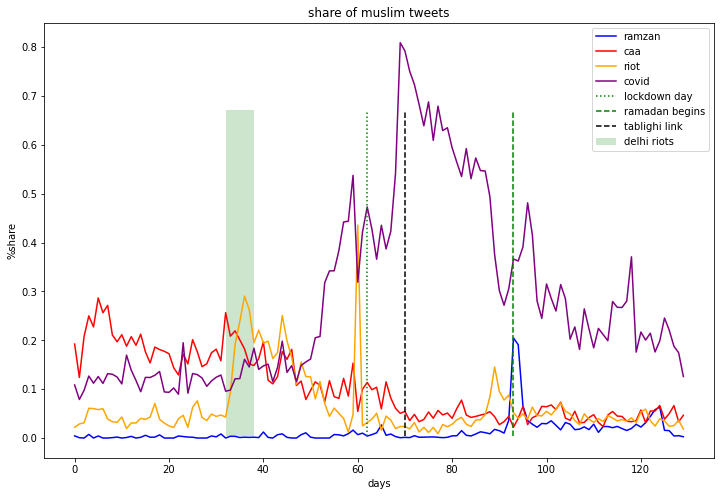

In [12]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot((hateful["ramzan_muslim_tweets"].values/hateful["muslim_tweets"].values), color = "blue", label = "ramzan")
ax.plot((hateful["caa_muslim_tweets"].values/hateful["muslim_tweets"].values), color = "red", label = "caa")
ax.plot((hateful["riot_muslim_tweets"].values/hateful["muslim_tweets"].values), color = "orange", label = "riot")
ax.plot((hateful["covid_muslim_tweets"].values/hateful["muslim_tweets"].values), color = "purple", label = "covid")
ax.axvline(x = 62, linestyle = "dotted", color = "green", ymin = 0.05, ymax = 0.8, label = "lockdown day")
ax.axvline(x = 93, linestyle = "dashed", color = "green", ymin = 0.05, ymax = 0.8, label = "ramadan begins")
ax.axvline(x = 70, linestyle = "dashed", color = "black", ymin = 0.05, ymax = 0.8, label = "tablighi link")
ax.axvspan(32, 38, ymin = 0.05, ymax = 0.8, facecolor = "green", linestyle = "dotted", alpha = 0.2, label = "delhi riots")
ax.set(xlabel = "days", ylabel = "%share", title = "share of muslim tweets")
ax.legend()

In [197]:
riot_terms

['danga',
 'pogroms',
 'roit',
 'rioting',
 'genocide',
 'massacre',
 'carnage',
 'pogrom',
 'lynching',
 'roits',
 'genocides',
 'riot',
 'riots',
 'rioters']

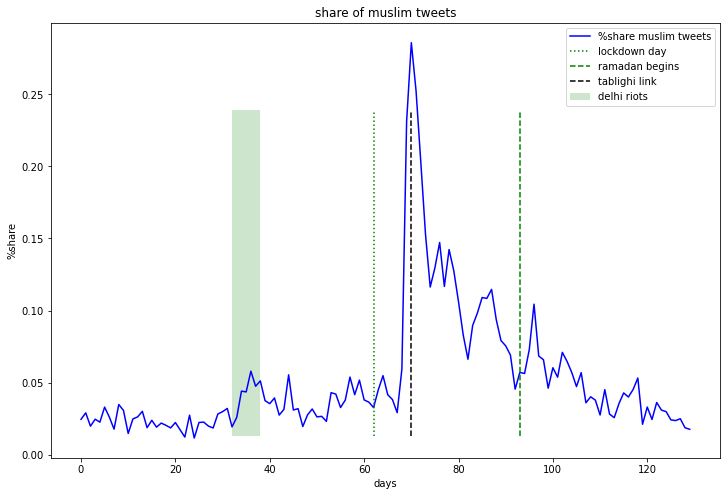

In [202]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot((national_df["covid_muslim_abusive"].values/national_df["all_abusive"].values), color = "blue", label = "%share muslim tweets")
ax.axvline(x = 62, linestyle = "dotted", color = "green", ymin = 0.05, ymax = 0.8, label = "lockdown day")
ax.axvline(x = 93, linestyle = "dashed", color = "green", ymin = 0.05, ymax = 0.8, label = "ramadan begins")
ax.axvline(x = 70, linestyle = "dashed", color = "black", ymin = 0.05, ymax = 0.8, label = "tablighi link")
ax.axvspan(32, 38, ymin = 0.05, ymax = 0.8, facecolor = "green", linestyle = "dotted", alpha = 0.2, label = "delhi riots")
ax.set(xlabel = "days", ylabel = "%share", title = "share of muslim tweets")
ax.legend()

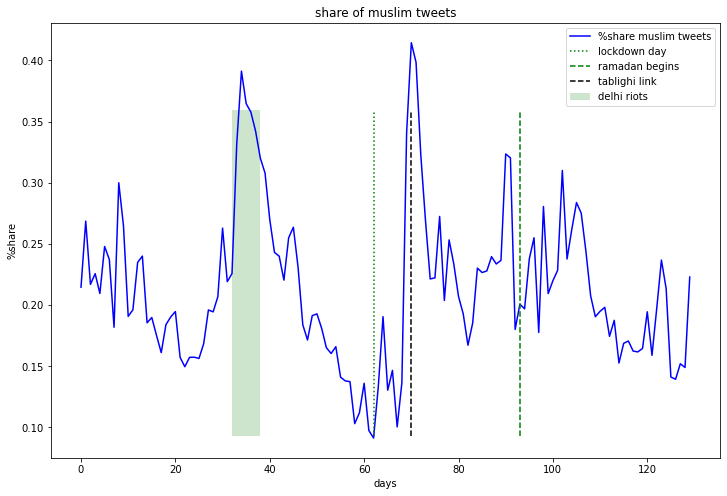

In [16]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot((hateful["muslim_abusive"].values/hateful["all_abusive"]), color = "blue", label = "%share muslim tweets")
ax.axvline(x = 62, linestyle = "dotted", color = "green", ymin = 0.05, ymax = 0.8, label = "lockdown day")
ax.axvline(x = 93, linestyle = "dashed", color = "green", ymin = 0.05, ymax = 0.8, label = "ramadan begins")
ax.axvline(x = 70, linestyle = "dashed", color = "black", ymin = 0.05, ymax = 0.8, label = "tablighi link")
ax.axvspan(32, 38, ymin = 0.05, ymax = 0.8, facecolor = "green", linestyle = "dotted", alpha = 0.2, label = "delhi riots")
ax.set(xlabel = "days", ylabel = "%share", title = "share of muslim tweets")
ax.legend()

In [186]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\national_all_hateful_details.pkl", "wb") as f:
    pickle.dump(national_df, f)

In [2]:
with open("C:\\Users\\rahul\\Complete thesis data\\Models\\national_all_hateful_details.pkl", "rb") as f:
    hateful = pickle.load(f)

In [4]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [5]:
hateful

,date,all_tweets,all_abusive,muslim_tweets,muslim_abusive,caa_tweets,caa_abusive,caa_muslim_tweets,caa_muslim_abusive,riot_tweets,riot_abusive,riot_muslim_tweets,riot_muslim_abusive,covid_tweets,covid_abusive,covid_muslim_tweets,covid_muslim_abusive,ramzan_tweets,ramzan_abusive,ramzan_muslim_tweets,ramzan_muslim_abusive
0,2020-01-22,20704,1584,681,340,1567,150,131,54,114,20,15,8,1037,89,74,39,16,4,3,1
1,2020-01-23,24086,1891,1597,508,1543,185,198,98,237,43,46,23,1193,113,126,55,3,0,1,0
2,2020-01-24,23208,1913,799,415,1504,164,166,80,168,36,25,16,1266,94,78,38,14,3,0,0
3,2020-01-25,23429,2025,804,457,1695,271,201,121,283,73,49,33,1457,133,102,50,27,6,6,5
4,2020-01-26,29321,2430,963,509,1906,247,219,112,416,70,58,35,1384,141,108,55,4,0,0,0
5,2020-01-27,24212,2025,945,502,1891,273,271,137,259,67,55,35,1296,144,119,67,17,7,4,4
6,2020-01-28,24032,1909,850,453,1679,252,218,120,256,68,51,32,1522,133,95,50,6,0,0,0
7,2020-01-29,26264,2078,744,378,1786,268,202,119,287,57,29,14,1898,155,98,37,13,1,0,0
8,2020-01-30,25180,2237,1195,671,1867,289,252,132,252,55,40,27,1792,180,156,78,34,0,1,0
9,2020-01-31,24917,2047,1025,542,1378,216,202,118,234,68,33,26,1909,153,128,63,29,3,2,2


In [20]:
wv.most_similar(positive = ["separatist"], topn = 100)

[('jihadi', 0.5130548477172852),
 ('antinational', 0.4821142256259918),
 ('islamist', 0.46936264634132385),
 ('leftist', 0.46837496757507324),
 ('anti', 0.4657287299633026),
 ('separatists', 0.46430787444114685),
 ('terrorist', 0.4623575806617737),
 ('jehaadi', 0.4596075415611267),
 ('nationalist', 0.45781534910202026),
 ('jehadi', 0.447793185710907),
 ('radical', 0.44136300683021545),
 ('extremist', 0.4392126798629761),
 ('supremacist', 0.4378342926502228),
 ('hindutua', 0.43779799342155457),
 ('jihadis', 0.43515872955322266),
 ('isis', 0.4222341775894165),
 ('fascist', 0.42192286252975464),
 ('traitors', 0.4199443459510803),
 ('terrorism', 0.4199402928352356),
 ('traitorous', 0.4196893572807312),
 ('communists', 0.4167172908782959),
 ('hindutva', 0.4161887764930725),
 ('terrorists', 0.4160609245300293),
 ('communist', 0.4133527874946594),
 ('tukde', 0.40822333097457886),
 ('wahhabi', 0.4076792299747467),
 ('zihadi', 0.39830923080444336),
 ('naxalite', 0.3982710838317871),
 ('radicals

In [49]:
muslim_share = hateful["muslim_abusive"].values/hateful["all_abusive"].values

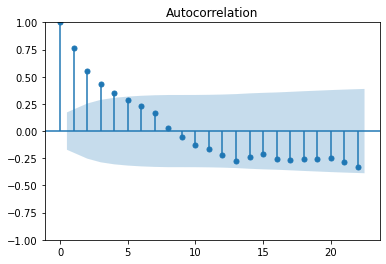

In [50]:
muslim_acf = plot_acf(muslim_share)

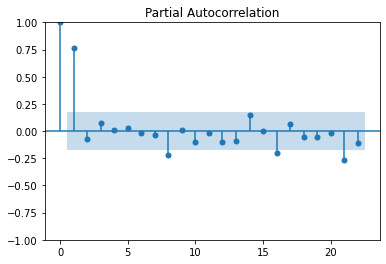

In [52]:
muslim_pacf = plot_pacf(muslim_share, method = "ywm")

In [63]:
caa_share = hateful["caa_muslim_abusive"].values/hateful["all_abusive"].values

In [64]:
caa_share

array([0.03409091, 0.05182443, 0.04181913, 0.05975309, 0.04609053,
       0.06765432, 0.06286014, 0.0572666 , 0.0590076 , 0.05764533,
       0.04660088, 0.04343582, 0.052     , 0.0464415 , 0.03288315,
       0.04175947, 0.02600619, 0.0368932 , 0.03514377, 0.02889825,
       0.03188602, 0.02439024, 0.02024584, 0.02807018, 0.02874743,
       0.02817711, 0.03370058, 0.03015682, 0.03080873, 0.02955975,
       0.04870892, 0.04068241, 0.05024213, 0.06871219, 0.08459401,
       0.07344452, 0.06579926, 0.04908453, 0.04839483, 0.05192397,
       0.05347326, 0.03329634, 0.02620968, 0.02707809, 0.05353728,
       0.04542738, 0.04454203, 0.02163624, 0.01958136, 0.01140065,
       0.02090357, 0.0223504 , 0.02047782, 0.01591512, 0.01870616,
       0.01404682, 0.01213961, 0.01819407, 0.0102414 , 0.01843972,
       0.00666349, 0.01083856, 0.01426307, 0.02129817, 0.02454261,
       0.00980873, 0.01774872, 0.01063264, 0.00990615, 0.01899593,
       0.02688   , 0.01624601, 0.02164644, 0.01013133, 0.00848

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

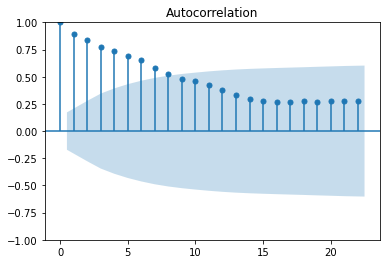

In [65]:
caa_acf = plot_acf(caa_share)

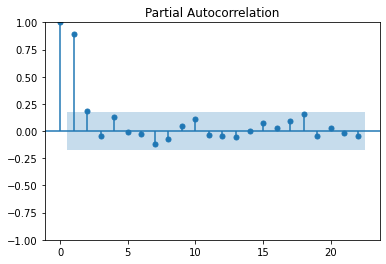

In [66]:
caa_pacf = plot_pacf(caa_share, method = "ywm")

In [67]:
covid_share = hateful["covid_muslim_abusive"].values/hateful["all_abusive"].values

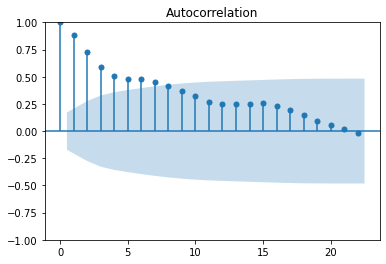

In [68]:
covid_acf = plot_acf(covid_share)

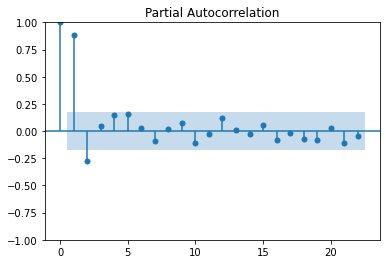

In [69]:
covid_pacf = plot_pacf(covid_share, method = "ywm")

In [70]:
riot_share = hateful["riot_muslim_abusive"].values/hateful["all_abusive"].values

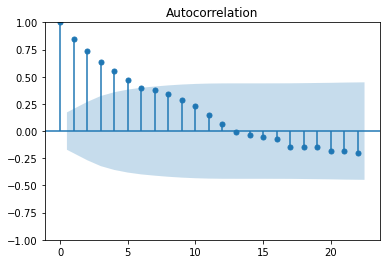

In [71]:
riot_acf = plot_acf(riot_share)

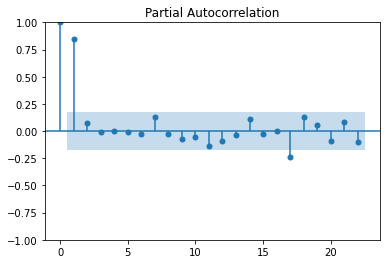

In [72]:
riot_pacf = plot_pacf(riot_share, method = "ywm")

In [73]:
ramzan_share = hateful["ramzan_muslim_abusive"].values/hateful["all_abusive"].values

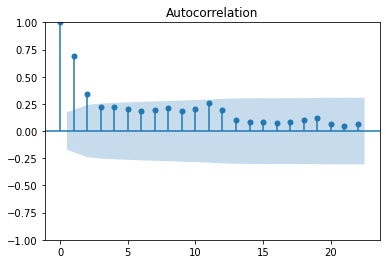

In [74]:
ramzan_acf = plot_acf(ramzan_share)

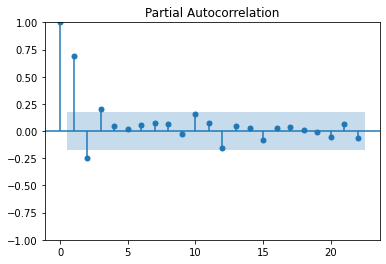

In [75]:
ramzan_pacf = plot_pacf(ramzan_share, method = "ywm")

In [76]:
causality_df = pd.DataFrame()
causality_df["caa_share"] = caa_share
causality_df["riot_share"] = riot_share
causality_df["covid_share"] = covid_share
causality_df["ramzan_share"] = ramzan_share
causality_df["muslim_share"] = muslim_share

In [77]:
causality_df

,caa_share,riot_share,covid_share,ramzan_share,muslim_share
0,0.034091,0.005051,0.024621,0.000631,0.214646
1,0.051824,0.012163,0.029085,0.000000,0.268641
2,0.041819,0.008364,0.019864,0.000000,0.216937
3,0.059753,0.016296,0.024691,0.002469,0.225679
4,0.046091,0.014403,0.022634,0.000000,0.209465
5,0.067654,0.017284,0.033086,0.001975,0.247901
6,0.062860,0.016763,0.026192,0.000000,0.237297
7,0.057267,0.006737,0.017806,0.000000,0.181906
8,0.059008,0.012070,0.034868,0.000000,0.299955
9,0.057645,0.012702,0.030777,0.000977,0.264778


In [55]:
from statsmodels.tsa.stattools import grangercausalitytests as gct

In [78]:
caa_causality = gct(causality_df[["muslim_share", "caa_share"]], maxlag = 5, verbose = True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0173  , p=0.3151  , df_denom=126, df_num=1
ssr based chi2 test:   chi2=1.0415  , p=0.3075  , df=1
likelihood ratio test: chi2=1.0373  , p=0.3085  , df=1
parameter F test:         F=1.0173  , p=0.3151  , df_denom=126, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4686  , p=0.6270  , df_denom=123, df_num=2
ssr based chi2 test:   chi2=0.9753  , p=0.6141  , df=2
likelihood ratio test: chi2=0.9716  , p=0.6152  , df=2
parameter F test:         F=0.4686  , p=0.6270  , df_denom=123, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3977  , p=0.7549  , df_denom=120, df_num=3
ssr based chi2 test:   chi2=1.2626  , p=0.7380  , df=3
likelihood ratio test: chi2=1.2564  , p=0.7395  , df=3
parameter F test:         F=0.3977  , p=0.7549  , df_denom=120, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.0049  , p=0.4080  

In [79]:
riot_causality = gct(causality_df[["muslim_share", "riot_share"]], maxlag = 5, verbose = True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0789  , p=0.7792  , df_denom=126, df_num=1
ssr based chi2 test:   chi2=0.0808  , p=0.7762  , df=1
likelihood ratio test: chi2=0.0808  , p=0.7762  , df=1
parameter F test:         F=0.0789  , p=0.7792  , df_denom=126, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2374  , p=0.7891  , df_denom=123, df_num=2
ssr based chi2 test:   chi2=0.4940  , p=0.7811  , df=2
likelihood ratio test: chi2=0.4931  , p=0.7815  , df=2
parameter F test:         F=0.2374  , p=0.7891  , df_denom=123, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2111  , p=0.8885  , df_denom=120, df_num=3
ssr based chi2 test:   chi2=0.6703  , p=0.8802  , df=3
likelihood ratio test: chi2=0.6685  , p=0.8806  , df=3
parameter F test:         F=0.2111  , p=0.8885  , df_denom=120, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.1882  , p=0.9441  

In [80]:
ramzan_causality = gct(causality_df[["muslim_share", "ramzan_share"]], maxlag = 5, verbose = True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1466  , p=0.7024  , df_denom=126, df_num=1
ssr based chi2 test:   chi2=0.1501  , p=0.6984  , df=1
likelihood ratio test: chi2=0.1500  , p=0.6985  , df=1
parameter F test:         F=0.1466  , p=0.7024  , df_denom=126, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1277  , p=0.8802  , df_denom=123, df_num=2
ssr based chi2 test:   chi2=0.2658  , p=0.8756  , df=2
likelihood ratio test: chi2=0.2655  , p=0.8757  , df=2
parameter F test:         F=0.1277  , p=0.8802  , df_denom=123, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0559  , p=0.9826  , df_denom=120, df_num=3
ssr based chi2 test:   chi2=0.1774  , p=0.9812  , df=3
likelihood ratio test: chi2=0.1773  , p=0.9812  , df=3
parameter F test:         F=0.0559  , p=0.9826  , df_denom=120, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.0516  , p=0.9950  

In [81]:
covid_causality = gct(causality_df[["muslim_share", "covid_share"]], maxlag = 5, verbose = True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6036  , p=0.4387  , df_denom=126, df_num=1
ssr based chi2 test:   chi2=0.6179  , p=0.4318  , df=1
likelihood ratio test: chi2=0.6165  , p=0.4324  , df=1
parameter F test:         F=0.6036  , p=0.4387  , df_denom=126, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.4979  , p=0.0864  , df_denom=123, df_num=2
ssr based chi2 test:   chi2=5.1988  , p=0.0743  , df=2
likelihood ratio test: chi2=5.0960  , p=0.0782  , df=2
parameter F test:         F=2.4979  , p=0.0864  , df_denom=123, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.7219  , p=0.0474  , df_denom=120, df_num=3
ssr based chi2 test:   chi2=8.6420  , p=0.0344  , df=3
likelihood ratio test: chi2=8.3607  , p=0.0391  , df=3
parameter F test:         F=2.7219  , p=0.0474  , df_denom=120, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.3010  , p=0.0627  

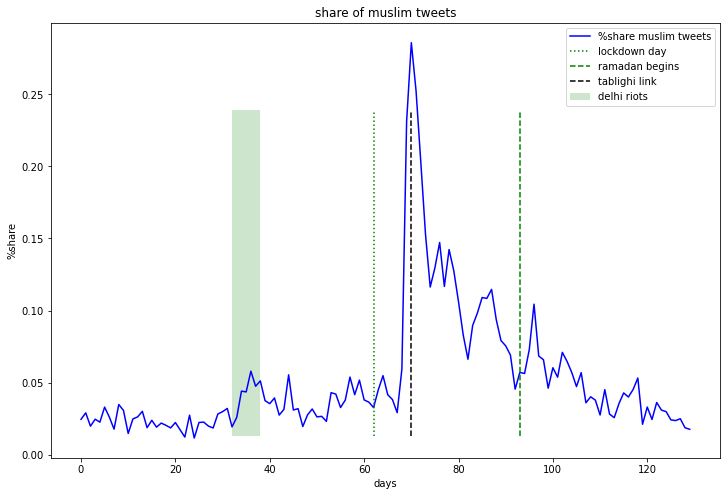

In [13]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot((hateful["covid_muslim_abusive"].values/hateful["all_abusive"].values), color = "blue", label = "%share muslim tweets")
ax.axvline(x = 62, linestyle = "dotted", color = "green", ymin = 0.05, ymax = 0.8, label = "lockdown day")
ax.axvline(x = 93, linestyle = "dashed", color = "green", ymin = 0.05, ymax = 0.8, label = "ramadan begins")
ax.axvline(x = 70, linestyle = "dashed", color = "black", ymin = 0.05, ymax = 0.8, label = "tablighi link")
ax.axvspan(32, 38, ymin = 0.05, ymax = 0.8, facecolor = "green", linestyle = "dotted", alpha = 0.2, label = "delhi riots")
ax.set(xlabel = "days", ylabel = "%share", title = "share of muslim tweets")
ax.legend()